## Non vectorized approach

In [259]:
import numpy as np
import matplotlib.pyplot as plt

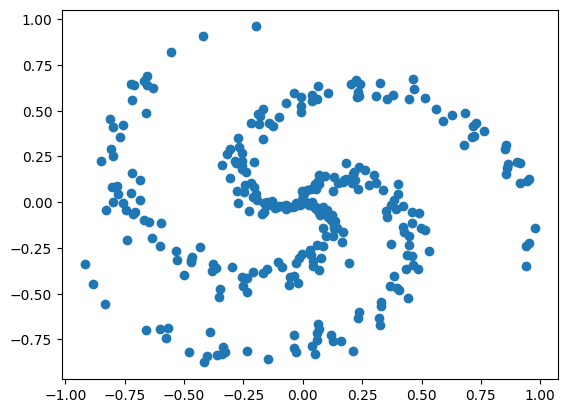

In [260]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [261]:
x = X[:, 0]
y = X[:, 1]

In [262]:
K = 3

In [263]:
k1 = np.random.randint(0,300)
k2 = np.random.randint(0,300)
k3 = np.random.randint(0,300)

In [264]:
print(k1, k2, k3)

27 2 36


In [265]:
n = 0
dd = {}
min_point = 0
for i, j in zip(x, y):
    
    given_point = np.array([i, j])
    
    p1 = np.array([x[k1], y[k1]])
    p2 = np.array([x[k2], y[k2]])
    p3 = np.array([x[k3], y[k3]])

    p1_dist = np.linalg.norm(p1-given_point)
    p2_dist = np.linalg.norm(p2-given_point)
    p3_dist = np.linalg.norm(p3-given_point)

    if p1_dist < p2_dist and p1_dist < p3_dist:
        min_point = p1
        dd[n] = 1
    elif p2_dist < p1_dist and p2_dist < p3_dist:
        min_point = p2
        dd[n] = 2
    else:
        min_point = p3
        dd[n] = 3
    n = n + 1
    

In [266]:
x_one, x_two, x_three = [], [], []
y_one, y_two, y_three = [], [], []

for key, value in dd.items():
    if value == 1:
        x_one.append(x[key])
        y_one.append(y[key])
    elif value == 2:
        x_two.append(x[key])
        y_two.append(y[key])
    else:
        x_three.append(x[key])
        y_three.append(y[key])


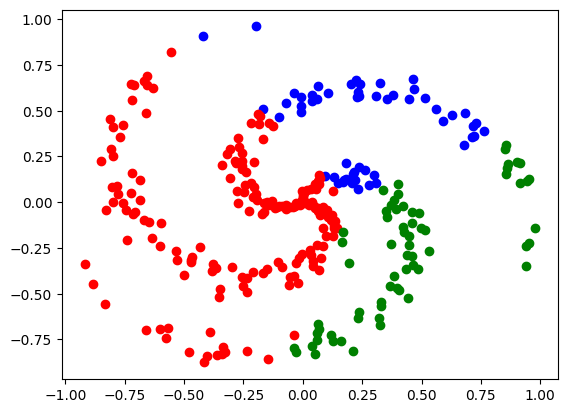

In [267]:
plt.scatter(x_one, y_one, color='blue')
plt.scatter(x_two, y_two, color='red')
plt.scatter(x_three, y_three, color='green')
plt.show()

In [268]:
len(x_one), len(x_two), len(x_three)

(55, 180, 65)

In [269]:
## update 1
x_one_centroid, y_one_centroid = np.mean(x_one), np.mean(y_one)
x_two_centroid, y_two_centroid = np.mean(x_two), np.mean(y_two)
x_three_centroid, y_three_centroid = np.mean(x_three), np.mean(y_three)

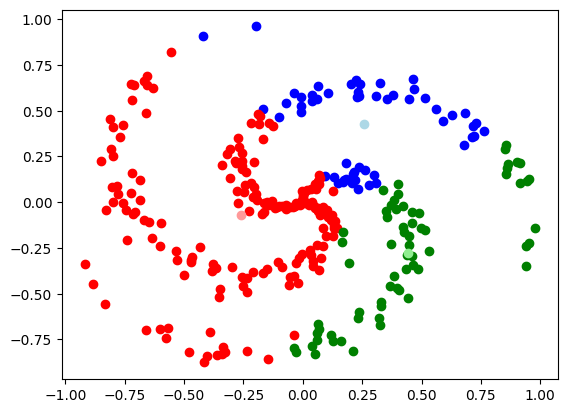

In [270]:
plt.scatter(x_one, y_one, color='blue')
plt.scatter(x_one_centroid, y_one_centroid, color='lightblue')

plt.scatter(x_two, y_two, color='red')
plt.scatter(x_two_centroid, y_two_centroid, color='#FF9999')

plt.scatter(x_three, y_three, color='green')
plt.scatter(x_three_centroid, y_three_centroid, color='lightgreen')

plt.show()

In [271]:
total_iterations = 0
while total_iterations < 20:

    n = 0
    min_point = 0
    dd = {}
    
    for i, j in zip(x, y):
        given_point = np.array([i, j])
        p1 = np.array([x_one_centroid, y_one_centroid])
        p2 = np.array([x_two_centroid, y_two_centroid])
        p3 = np.array([x_three_centroid, y_three_centroid])


        p1_dist = np.linalg.norm(p1-given_point)
        p2_dist = np.linalg.norm(p2-given_point)
        p3_dist = np.linalg.norm(p3-given_point)


        if p1_dist < p2_dist and p1_dist < p3_dist:
            min_point = p1
            dd[n] = 1
        elif p2_dist < p1_dist and p2_dist < p3_dist:
            min_point = p2
            dd[n] = 2
        else:
            min_point = p3
            dd[n] = 3
        n = n + 1

    x_one, x_two, x_three = [], [], []
    y_one, y_two, y_three = [], [], []

    for key, value in dd.items():
        if value == 1:
            x_one.append(x[key])
            y_one.append(y[key])
        elif value == 2:
            x_two.append(x[key])
            y_two.append(y[key])
        else:
            x_three.append(x[key])
            y_three.append(y[key])
            
    x_one_centroid, y_one_centroid = np.mean(x_one), np.mean(y_one)
    x_two_centroid, y_two_centroid = np.mean(x_two), np.mean(y_two)
    x_three_centroid, y_three_centroid = np.mean(x_three), np.mean(y_three)

    print(f"X_one length : {len(x_one)}, X_two length : {len(x_two)}, X_three length : {len(x_three)}")
    print(p1_dist, p2_dist, p3_dist)

    total_iterations = total_iterations + 1

X_one length : 71, X_two length : 156, X_three length : 73
0.8326028757419942 0.9908061041156028 1.4671384365155666
X_one length : 80, X_two length : 138, X_three length : 82
0.8298695478114362 1.001742751802156 1.4413124400849102
X_one length : 86, X_two length : 126, X_three length : 88
0.8562671362755171 0.9906870359200617 1.4167512928649941
X_one length : 86, X_two length : 120, X_three length : 94
0.8847064252730004 0.9760041541668001 1.4007356494003746
X_one length : 88, X_two length : 107, X_three length : 105
0.8991152228588953 0.9524138198857978 1.3917992344902719
X_one length : 89, X_two length : 94, X_three length : 117
0.8983079040081876 0.9157290635992352 1.3815274003269564
X_one length : 91, X_two length : 88, X_three length : 121
0.9141395538812792 0.8761150331575562 1.3574517932458554
X_one length : 90, X_two length : 86, X_three length : 124
0.9458551661055884 0.8487314518751239 1.3423962228794877
X_one length : 91, X_two length : 82, X_three length : 127
0.98402567303

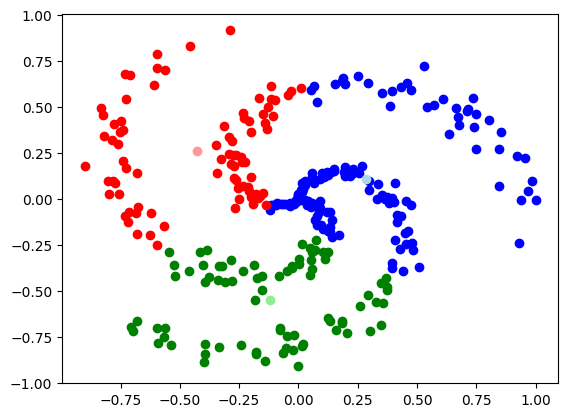

In [234]:
plt.scatter(x_one, y_one, color='blue')
plt.scatter(x_one_centroid, y_one_centroid, color='lightblue')

plt.scatter(x_two, y_two, color='red')
plt.scatter(x_two_centroid, y_two_centroid, color='#FF9999')

plt.scatter(x_three, y_three, color='green')
plt.scatter(x_three_centroid, y_three_centroid, color='lightgreen')

plt.show()

In [272]:
wcss = 0
for key, value in dd.items():
    if value == 1:
        wcss = wcss + (x_one_centroid - x[key])**2 + (y_one_centroid - y[key])**2
    elif value == 2:
        wcss = wcss + (x_two_centroid - x[key])**2 + (y_two_centroid - y[key])**2
    else:
        wcss = wcss + (x_three_centroid - x[key])**2 + (y_three_centroid - y[key])**2
print(wcss)

45.22701925457591


In [273]:
len(dd)

300

In [246]:
def clustering_quality_metrics():
    
    wcss = 0
    for key, value in dd.items():
        if value == 1:
            wcss = wcss + np.sqrt((x_one_centroid - x[key])**2 + (y_one_centroid - y[key])**2) 
        elif value == 2:
            wcss = wcss + np.sqrt((x_two_centroid - x[key])**2 + (y_two_centroid - y[key])**2)
        else:
            wcss = wcss + np.sqrt((x_three_centroid - x[key])**2 + (y_three_centroid - y[key])**2)

    
    avg_intra_clstr = wcss / len(dd)

    c_one = np.array([x_one_centroid, y_one_centroid])
    c_two = np.array([x_two_centroid, y_two_centroid])
    c_three = np.array([x_three_centroid, y_three_centroid])

    min_dist = min(np.linalg.norm(c_one - c_two), np.linalg.norm(c_one - c_three), np.linalg.norm(c_two - c_three))

    return avg_intra_clstr, min_dist

## Vectorized Approach

In [300]:
def kmeans_from_scratch(K):

    idx = np.random.choice(len(x), K, replace=False)
    
    cx = x[idx]
    cy = y[idx]
    
    for i in range(20):
    
        dists = np.sqrt((x[:, None] - cx[None, :])**2 +(y[:, None] - cy[None, :])**2)
    
        labels = np.argmin(dists, axis=1)
    
        #print(f'X_one length: {sum(labels == 0)}, X_two length: {sum(labels == 1)}, X_three: {sum(labels == 2)} ')
    
        new_cx = np.array([x[labels == k].mean() for k in range(K)])
        new_cy = np.array([y[labels == k].mean() for k in range(K)])
    
        if np.allclose(cx, new_cx) and np.allclose(cy, new_cy):
            break
    
        cx, cy = new_cx, new_cy

    wcss = np.sum((x - cx[labels])**2 + (y - cy[labels])**2)

    return cx, cy, labels, wcss

In [301]:
cx, cy, labels, wcss = kmeans_from_scratch(3)

In [302]:
def kmeans_best_of_n(n_init=10):

    lowest_wcss = np.inf
    
    for i in range(n_init):

        _, _, _, wcss = kmeans_from_scratch(K)
        if wcss < lowest_wcss:
            lowest_idx = i
            lowest_wcss = wcss

    return lowest_idx, lowest_wcss
    

In [303]:
kmeans_best_of_n(n_init=10)

(6, np.float64(44.081786763465054))

In [304]:
def clustering_quality_metrics():

    mean_intra = np.mean(np.sqrt((x - cx[labels])**2 + (y - cy[labels])**2))
    
    min_dist = np.inf
    for i in range(3):
        for j in range(3):
            if i != j:
                dist = np.linalg.norm(centroids[i] - centroids[j])
                if dist < min_dist:
                    min_dist = dist

    return mean_wcss, min_dist